<a href="https://colab.research.google.com/github/pratikwatwani/Applied-Data-Science/blob/master/Session%2010/Network%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e', 'degrees']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Task 1. Analysis of Les Miserables network 

In [0]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
G = nx.read_gml('/content/drive/My Drive/lesmis.gml')

### Q1. Visualize the network below with node labes and sizes proportional to node degree

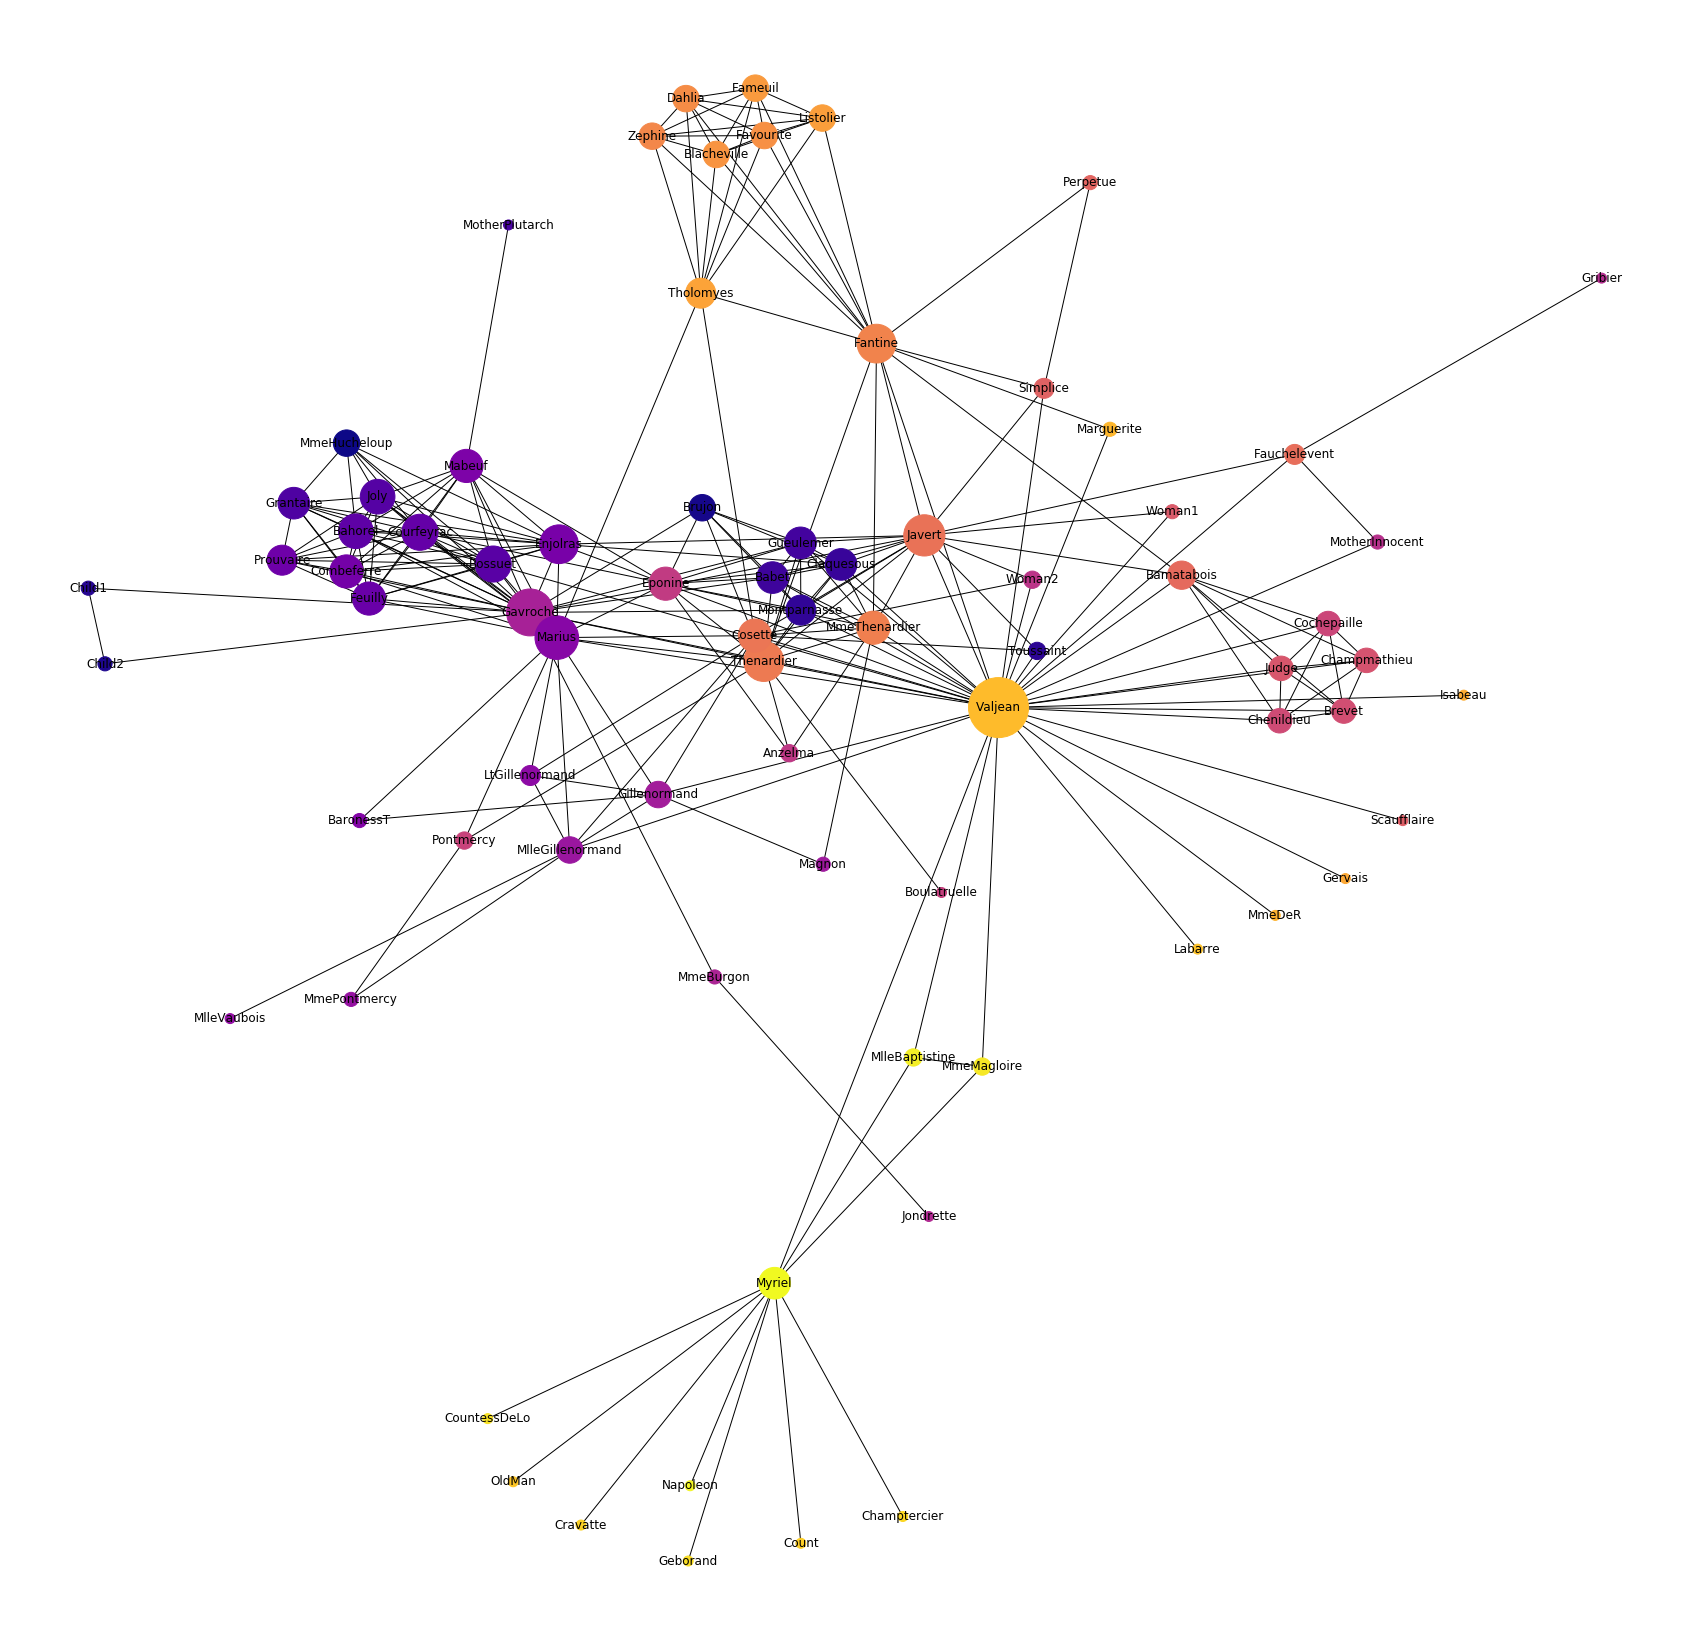

In [40]:
np.random.seed(1612)
fig, ax = plt.subplots(figsize = (30,30))
a = nx.draw(G,with_labels=True,node_size=100*np.array(list(dict(G.degree()).values())), node_color = range(len(G.degree())), cmap='plasma_r', node_shape = 'o')
plt.show()

### Q2. Report top nodes by centrality
Print the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) betweenness centrality;

In [41]:
centrality_df = pd.DataFrame(dict(G.degree()), index = [0]).T
centrality_df.columns = ['Count']
centrality_df.sort_values(ascending = False, by = 'Count', inplace = True)
centrality_df.head(5)

,Count
Valjean,36
Gavroche,22
Marius,19
Javert,17
Thenardier,16


In [42]:
centrality_between_df = pd.DataFrame(nx.betweenness_centrality(G), index = [0]).T
centrality_between_df.columns = ['Count']
centrality_between_df.sort_values(ascending = False, by = 'Count', inplace = True)
centrality_between_df.head(5)

,Count
Valjean,0.569989
Myriel,0.176842
Gavroche,0.165113
Marius,0.132032
Fantine,0.129645


### Q3. Analyze stability of Pagerank centrality
Analyze the impact of parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

In [43]:
alphas = [0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
pr = nx.pagerank(G)
pr.keys()
page_rank_df = pd.DataFrame(pr.keys())
for alpha in alphas:
  page_rank = nx.pagerank(G, alpha = alpha)
  page_rank_df[alpha] = page_rank.values()


page_rank_df.set_index(page_rank_df.columns[0], drop = True, inplace = True)
page_rank_df.index.rename('City', inplace = True)
page_rank_df.head(50)

,0.95,0.90,0.85,0.80,0.70,0.60,0.50,0.40,0.30,0.20,0.10
City,,,,,,,,,,,
Myriel,0.033461,0.039655,0.042803,0.044341,0.044898,0.043550,0.040970,0.037425,0.032955,0.027495,0.020910
Napoleon,0.003831,0.004870,0.005584,0.006143,0.007038,0.007807,0.008543,0.009290,0.010079,0.010939,0.011897
MlleBaptistine,0.008490,0.009660,0.010279,0.010633,0.010980,0.011136,0.011253,0.011398,0.011614,0.011932,0.012379
MmeMagloire,0.008490,0.009660,0.010279,0.010633,0.010980,0.011136,0.011253,0.011398,0.011614,0.011932,0.012379
CountessDeLo,0.003831,0.004870,0.005584,0.006143,0.007038,0.007807,0.008543,0.009290,0.010079,0.010939,0.011897
Geborand,0.003831,0.004870,0.005584,0.006143,0.007038,0.007807,0.008543,0.009290,0.010079,0.010939,0.011897
Champtercier,0.003831,0.004870,0.005584,0.006143,0.007038,0.007807,0.008543,0.009290,0.010079,0.010939,0.011897
Cravatte,0.003831,0.004870,0.005584,0.006143,0.007038,0.007807,0.008543,0.009290,0.010079,0.010939,0.011897
Count,0.003831,0.004870,0.005584,0.006143,0.007038,0.007807,0.008543,0.009290,0.010079,0.010939,0.011897


### Task 2 (World airports). 
a) Find connected components, report their number and the sizes.  

b) In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$). 

c) Find maximum and average network distance of the shortest path (number of edges, ragardless of size) between all pairs of the airports from the largest connected component. 

In [44]:
cities = pd.read_csv( 'https://raw.githubusercontent.com/pratikwatwani/Applied-Data-Science/master/data/citiesTable.csv' , index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [0]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [46]:
#now read the links
links = pd.read_csv( 'https://raw.githubusercontent.com/pratikwatwani/Applied-Data-Science/master/data/citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [0]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]

In [0]:
#add edges to the network
Flights.add_edges_from(edgelist)

#1

In [49]:
alpha = [c for c in sorted(nx.connected_components(Flights), key=len, reverse=True)]
print("Number of connected components: {}\n\n\n".format(len(alpha)))
for x in range(len(alpha)):
  print("Component {}".format(x+1))
  print(alpha[x])
  print("Component Size: {}\n\n".format(len(alpha[x])))


Number of connected components: 4



Component 1
{'Ravensthorpe', 'Pristina', 'Darwin', 'Barrancabermeja', 'Navegantes', 'Puerto Escondido', 'Sihanoukville', 'Tyumen', 'Broughton Island', 'Chiang Rai', 'Kalamata', 'Malindi', 'Penzance', 'Dundee', 'Mukalla', 'Poprad', 'Fez', 'Las Palmas', 'Manzanillo', 'Macon', 'Tame', 'Nikolayev', 'Dera Ghazi Khan', 'Wolf Point', 'Waskaganish', 'Khanabad', 'Koliganek', 'Islamabad', 'Norfolk Island', 'Yerevan', 'North Bend', 'Missoula', 'El Fasher', 'Lynchburg', 'Banja Luka', 'Winnipeg', 'Chiang Mai', 'Kardla', 'Oakland', 'Hughes', 'Marau', 'Tarawa', 'Kerteh', 'Ji An', 'Nightmute', 'West Palm Beach', 'Papeete', 'Tromso', 'Ovda', 'Brest', 'Beaver', 'Pau', 'Port Williams', 'Thief River Falls', 'Kanazawa', 'Clovis', 'Papa Westray', 'Changzhi', 'Kwangju', 'Malta', 'Sucre', 'Mauke Island', 'Quincy', 'Maniitsoq', 'Mason City', 'Aviles', 'Escanaba', 'Trinidad', 'Afutara', 'Kristiansund', 'Dnepropetrovsk', 'The Pas', 'Santa Terezinha', 'Stella Maris', 'Wilmingt

In [50]:
print("The largest connected component is Component 1 with size {}".format(len(alpha[0])))

The largest connected component is Component 1 with size 2981


In [0]:
ls = []
for e in alpha[0]:
  ls.append(e)

In [52]:
ls[:11]

['Ravensthorpe',
 'Pristina',
 'Darwin',
 'Barrancabermeja',
 'Navegantes',
 'Puerto Escondido',
 'Sihanoukville',
 'Tyumen',
 'Broughton Island',
 'Chiang Rai',
 'Kalamata']

In [0]:
largest_cc = max(nx.connected_components(Flights), key=len)

In [54]:
Flights_new = Flights.subgraph(largest_cc)
Flights_new

In [55]:
degrees = dict(nx.degree(Flights_new))
degree = pd.DataFrame(degrees.values(), index = degrees.keys())
degree.sort_values(by = 0, ascending = False).head(10)

,0
London,311
Paris,267
Frankfurt,232
Moscow,229
Atlanta,208
Amsterdam,208
Chicago,199
Beijing,184
Istanbul,181
Dallas-fort Worth,181


In [56]:
betweenness = dict(nx.betweenness_centrality(Flights_new))
betweenness = pd.DataFrame(betweenness.values(), index = betweenness.keys())
betweenness.sort_values(by = 0, ascending = False).head(10)

,0
London,0.090767
Anchorage,0.082164
Paris,0.077842
Moscow,0.061038
Chicago,0.058135
Frankfurt,0.054523
Seattle,0.052720
Dubai,0.046443
Tokyo,0.045855
Toronto,0.045315


In [57]:
closeness = dict(nx.closeness_centrality(Flights_new))
closeness = pd.DataFrame(closeness.values(), index = closeness.keys())
closeness.sort_values(by = 0, ascending = False).head(10)

,0
London,0.423356
Frankfurt,0.417484
Paris,0.416376
Amsterdam,0.409453
New York,0.400538
Toronto,0.396329
Los Angeles,0.396013
Chicago,0.392725
Dubai,0.392622
Newark,0.389644


In [58]:
pagerank = dict(nx.pagerank(Flights_new,0.85))
pagerank = pd.DataFrame(pagerank.values(), index = pagerank.keys())
pagerank.sort_values(by = 0, ascending = False).head(10)

,0
London,0.006659
Moscow,0.006410
Paris,0.006296
Atlanta,0.005017
Frankfurt,0.004803
Chicago,0.004710
Dallas-fort Worth,0.004693
Denver,0.004626
Houston,0.004398
Amsterdam,0.004312


In [59]:
print("The maximum shortest path is: {}\nThe average shortest path is: {}".format(nx.diameter(Flights_new),nx.average_shortest_path_length(Flights_new)))

The maximum shortest path is: 12
The average shortest path is: 3.939842942663716
